# 손글씨 숫자 인식 예제

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/ML-Study/ML-Study/DeepLearning/dataset

/content/drive/MyDrive/Colab Notebooks/ML-Study/ML-Study/DeepLearning/dataset


In [3]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
import sys, os
sys.path.append(os.pardir)
from mnist import load_mnist
import pickle

In [4]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [5]:
def softmax(x):
  c = np.max(x)
  exp_x = np.exp(x - c)
  sum_exp_x = np.sum(exp_x)
  y = exp_x / sum_exp_x
  return y

In [6]:
# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형태 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  # pil_img.show()
  imshow(np.asarray(pil_img))

5
(784,)
(28, 28)


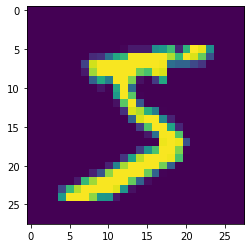

In [8]:
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

In [9]:
def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
  return x_test, t_test

def init_network():
  with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [10]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)
  if p == t[i]:
    accuracy_cnt += 1

print("Accracy:" + str(float(accuracy_cnt) / len(x)))

Accracy:0.9352


In [11]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accracy:" + str(float(accuracy_cnt) / len(x)))

Accracy:0.9352


In [12]:
x = np.array([[0.1, 0.8, 0.1],
              [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3],
              [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1) # 최댓값 인덱스를 찾기.
y

array([1, 2, 1, 0])